# Example jupyter notebook applications

## Markdown formating

With markdown, you can *easily* **format** your text.

### Unordered lists

- first item 
- second item
- third item

### Ordered lists

1. First item
1. Second item
1. Third item

### Tables

|Name|Specie|
|:---|-----:|
|Pluto|Dog|
|Donald|Duck|
|Tintin|Human|

### Add medias

Like images

![](img/doggy.jpg)

Or GIFS

![](img/homer.gif)

## Execute code

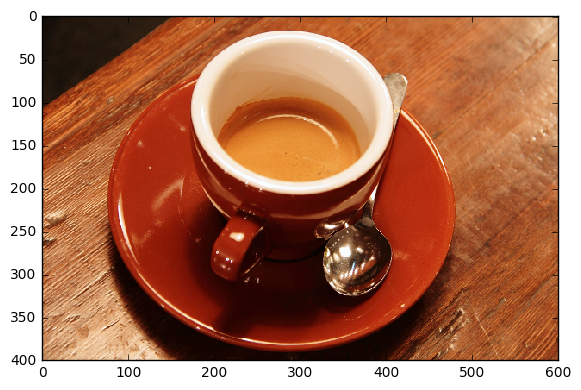

In [1]:
# IMage segmentation example from scikit image
from skimage import data, io, segmentation, color
from skimage.future import graph
import numpy as np
%matplotlib inline


def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """
    diff = graph.node[dst]['mean color'] - graph.node[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.node[dst]['total color'] += graph.node[src]['total color']
    graph.node[dst]['pixel count'] += graph.node[src]['pixel count']
    graph.node[dst]['mean color'] = (graph.node[dst]['total color'] /
                                     graph.node[dst]['pixel count'])

# IMport test image
img = data.coffee()

# Visualize image
io.imshow(img)
io.show()

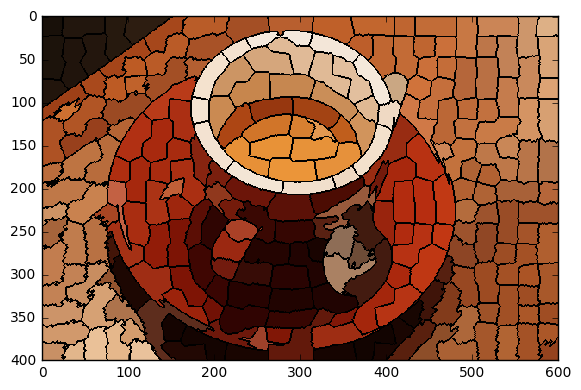

In [2]:
labels = segmentation.slic(img, compactness=30, n_segments=400)
g = graph.rag_mean_color(img, labels)

labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)

g2 = graph.rag_mean_color(img, labels2)

out = color.label2rgb(labels2, img, kind='avg')
out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))
io.imshow(out)
io.show()
